# Lab 2:

The main purpose of Lab 0 is to familiarize yourselves with the camera. You should be able to capture an image, establish a basic understanding of camera parameters and adjust them in live image display to obatin the best image possible

### Import basic Python modules 

In [1]:
# Required imports 
import sys
import os
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
from instrumental.drivers.cameras import uc480
import scipy.io as sio

### Camera object instantiation

In [2]:
# initialize camera 
# lists the cameras that are detected. 
instruments = uc480.list_instruments()
# initiliaze the camera using the detected cameras.
cam = uc480.UC480_Camera(instruments[0])
# Open Camera. DONT FORGET TO CLOSE!
cam.open()

### Check camera properties, change Camera settings and grab an image. 

In [3]:
# Connect to the camera and set up the image memory
cam.open()
# view current camera params. 
cam.get_parameters()

Exposure Time: 66.62091228070176ms
Exposure Time Range: [0.008982456140350877 66.62091228070176]
Framerate: 14.997947649269046Hz
Pixel Clock: 24MHz
Gain: 1.0


#### Set Framerate

In [4]:
# set frame rate
cam.set_framerate(framerate = "7Hz")
# get exposure range, you can see that the frame rate will change the maximum exposure time. 
print(cam._get_exposure_range())
# print current frame rate
print(cam.framerate)

(<Quantity(0.00898245614, 'millisecond')>, <Quantity(142.790456, 'millisecond')>)
7.000578714507065 hertz


#### Set Exposure Time 

In [5]:
# get exposure range
cam._get_exposure_range()
"""
(0.008982456140350877 <Unit('millisecond')>,
 142.79045614035087 <Unit('millisecond')>)
"""

# set cam exposure (ms) 
cam._set_exposure('25 ms')
cam._get_exposure()


24.999797750787227 <Unit('millisecond')>

#### Setting Pixel Clock

In [6]:
# Set pixelclock (Use the default)
cam.set_pixelclock(pixel_clock='7MHz')

# show the current pixel clock. 
cam.pixelclock

7 <Unit('megahertz')>

#### Setting Gain 

In [7]:
# The master gain factor; 1.0 is the lowest gain, max gain is 4.0
# Use the default gain. 
cam._set_gain(30)

# get max gain 
cam.max_master_gain

# get current gain. 
cam.master_gain

1.92

In [8]:
cam.get_parameters()

Exposure Time: 85.50282844836643ms
Exposure Time Range: [0.008982456140350877 488.26301754385963]
Framerate: 2.0472896614601814Hz
Pixel Clock: 7MHz
Gain: 1.92


In [9]:
print(cam._width)

1280


In [10]:
print(cam._height)

1024


In [13]:
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()


(0, 0, 1280, 1024)

#### Take an image

In [15]:
## Part 1
# Taking 300 frames dark images at 100x100 AOI to calculate covariance and noise spectrum
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()
 
x = np.zeros((300,100,100))    
for i in range(300):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x[i,:,:] = img[200:300, 200:300]
    





# average = np.mean(avg,axis = 0)
# variance = np.var(avg, axis = 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
sio.savemat("300framesAOI_part1.mat", {"Images":x})

In [58]:
## Part 1
# Calculate covariance from 300 frames
'''
x: center image pixel for one frame
mean x: mean of center image pixel for 300 frames
y:  image pixels for one frame
mean y: mean of image pixels for 300 frames
'''
y = x
y_avg = np.mean(y, axis = 0)
print(y.shape)
print(y_avg.shape)
y_minus_yavg = np.zeros((300, 100, 100))
x_minus_xavg = np.zeros((300,1,1))
for i in range(300):
    y_minus_yavg[i,:,:] = y[i,:,:] - y_avg[:,:]
    x_minus_xavg[i] = y[i,50,50] - y_avg[50,50]

print(x_minus_xavg.shape)
print(y_minus_yavg.shape)
product = np.sum(np.multiply(x_minus_xavg ,y_minus_yavg),axis = 0)

print(product.shape)

covariance = product/299
print(covariance.shape)

(300, 100, 100)
(100, 100)
(300, 1, 1)
(300, 100, 100)
(100, 100)
(100, 100)


In [ ]:
# Part 1: Find NPS of dark image


### TO DO ###



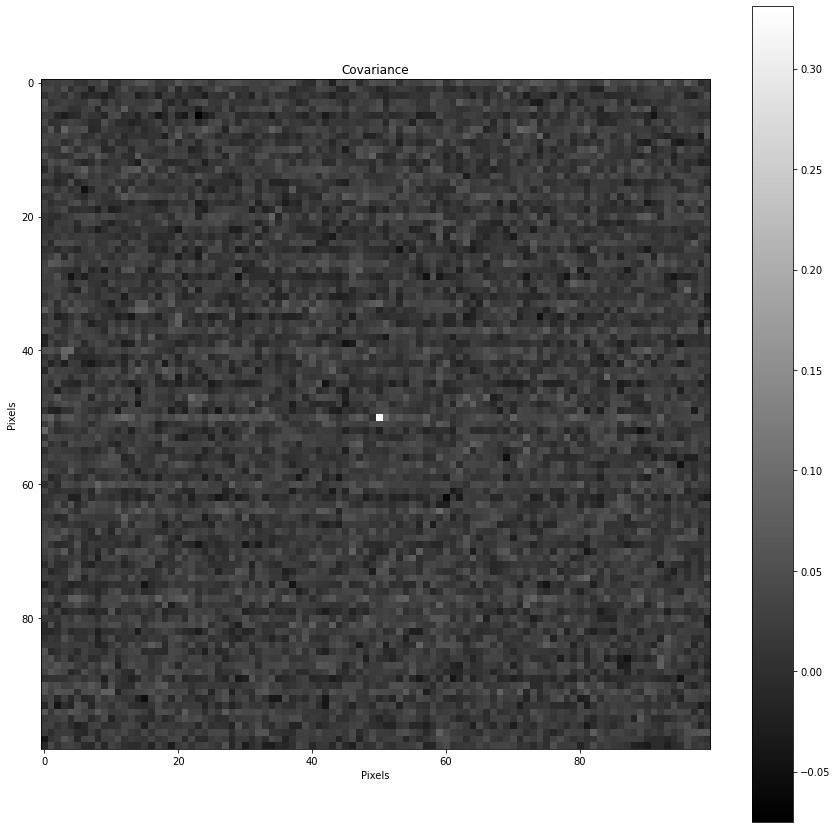

In [59]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.imshow(covariance, cmap = 'gray')
plt.title('Covariance')
plt.colorbar()


In [14]:
## Part 1
# Taking 300 frames light images at 100x100 AOI to calculate covariance and noise spectrum
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
# Focus: 0.4
# Aperature: 6

width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()
 
x2 = np.zeros((300,100,100))    
for i in range(300):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x2[i,:,:] = img[200:300, 400:500]
    
# Out of focus
# Focus: 
# Aperature: 6

cam._set_AOI(x0, y0, width, height)
x3 = np.zeros((300,100,100))    
for i in range(300):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x3[i,:,:] = img[200:300, 400:500]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [21]:
## Part 1
# Out of focus
# Focus: 
# Aperature: 6

cam._set_AOI(x0, y0, width, height)
x3 = np.zeros((300,100,100))    
for i in range(300):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x3[i,:,:] = img[200:300, 400:500]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
sio.savemat("300framesAOIlight_focused_part1.mat", {"Images":x2})
sio.savemat("300framesAOIlight_unfocused_part1.mat", {"Images":x3})

In [ ]:
## Part 1: Find covariance and NPS of focused and unfocused image


### TO DO ###

In [30]:
## Part 2: 50 frames line target 
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 


width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()
 
x11 = np.zeros((50,1024,1280))    
for i in range(50):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x11[i,:,:] = img
    
average_line_defocus8 = np.mean(x11, axis = 0)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [31]:
sio.savemat("50frames_lineTargetDefocus8_part2.mat", {"Images":x11, "Average":average_line_defocus8})

In [12]:
## Part 2: 50 frames star target 
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 


width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()
 
x12 = np.zeros((50,1024,1280))    
for i in range(50):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x12[i,:,:] = img
    
average_star_defocus8 = np.mean(x12, axis = 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [13]:
sio.savemat("50frames_starTarget_defocus8_part2.mat", {"Images":x12, "Average":average_star_defocus8})

In [18]:
## Part 2: 50 frames knife target (repeated at different angles)
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 


width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()
 
x13 = np.zeros((50,1024,1280))    
for i in range(50):
    print(i)
   
    #take an image
    img = cam.grab_image().copy()

    x13[i,:,:] = img
    
average_knife_defocus8 = np.mean(x13, axis = 0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [19]:
sio.savemat("50frames_knifeTarget_defocus8_part2.mat", {"Images":x13, "Average":average_knife_defocus8})

In [16]:
sio.savemat("50frames_knifeTarget_defocus8_angle2_part2.mat", {"Images":x14, "Average":average_knife2_defocus8})

In [16]:
float_img = avg.astype('float')
average = np.mean(float_img,axis = 0)
variance = np.var(float_img, axis = 0)

In [17]:
print(average)

[[ 3.52  3.58  3.66 ...  1.72  2.74  2.98]
 [ 3.58  4.74  3.32 ...  2.9   2.68  1.84]
 [ 4.82  4.72  3.24 ...  2.14  1.58  2.02]
 ...
 [ 6.    6.22 12.56 ...  4.76  5.38  8.72]
 [ 8.16  6.44  9.9  ...  8.36  9.16  8.3 ]
 [ 9.38 10.06  6.52 ...  7.06  6.54  8.82]]


In [ ]:
# Save Full-field frame-averaged offset image and noise image as .mat file
sio.savemat("50framesMean_part1.mat", {"average":average})
sio.savemat("50framesVariance_part1.mat", {"variance":variance})

In [5]:
# Check images are saved by loadmat()
average = sio.loadmat("50framesMean_part1.mat")
variance =  sio.loadmat("50framesVariance_part1.mat")

AttributeError: 'numpy.ndarray' object has no attribute 'type'

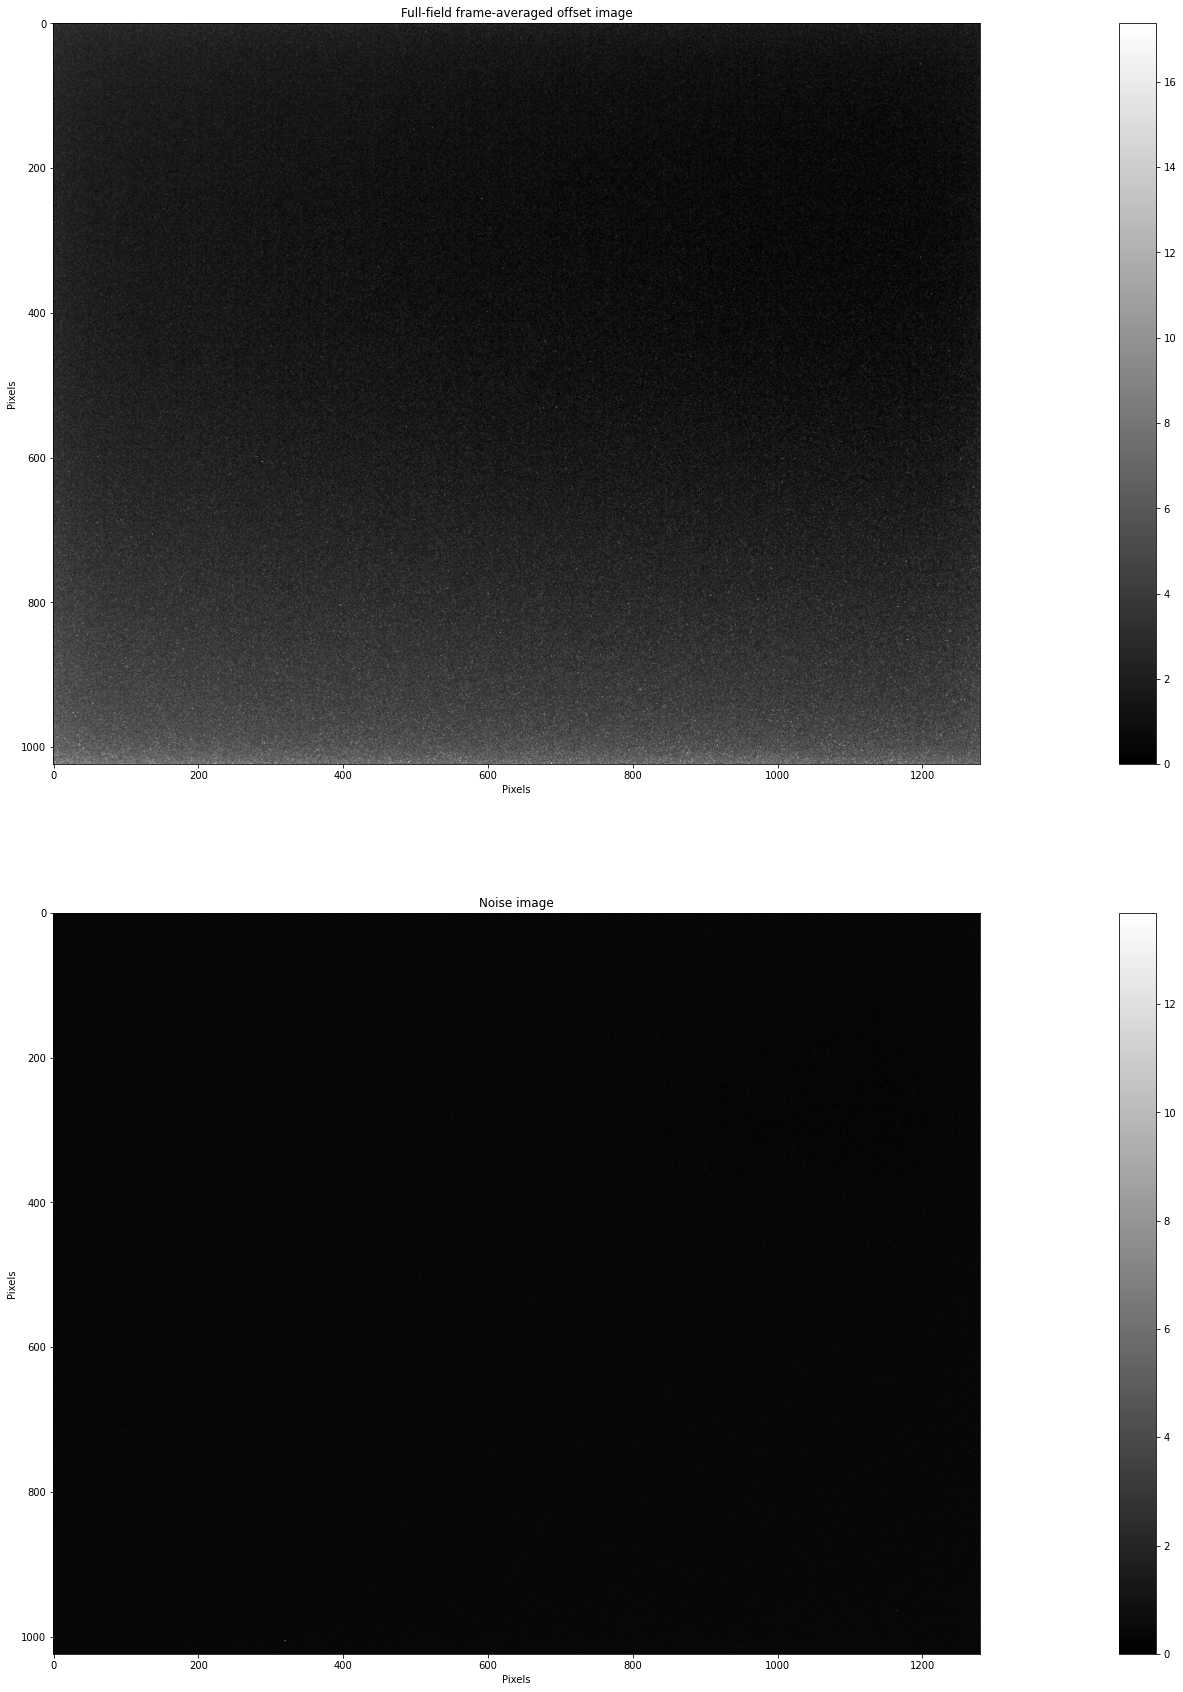

In [18]:
## Part 1
# Plot full-field frame-averaged offset image and noise image with colorbar
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(30)

f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(average, cmap = 'gray')
plt.title('Full-field frame-averaged offset image')
plt.colorbar()

f.add_subplot(2,1,2)
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Pixels")
ax2.set_ylabel("Pixels")
plt.imshow(variance, cmap = 'gray')
plt.title('Noise image')
plt.colorbar()

# Save two images as .png
f.savefig("50FramesAvgVar.png")


#### Set Image ROI

You don't always have to capture the full-field image, feel free to narow down to a specific ROI and focus on your target of interest

**Attention**: Set the image ROI based on coordinates. This sets the starting point (x_0, y_0) of the rectangular ROI. Then you set the width (X-direction Left to Right) and height of the rectangle (Y-direction top to bottom).

In [19]:
# get size of max image. 
cam.open()
cam._get_max_img_size() # Width, Height

(1280, 1024)

In [20]:
# set the image ROI based on coordinates. 
# This sets the starting point of the rectangle in the X-direction west to east. and Y-direction north to south
x0, y0 = 600, 0
# this sets the width and height of the rectangle. 
width, height = 100, 100
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

(600, 0, 100, 100)

In [23]:
## Part 1
# 100 frames at 15 exposures
x = np.zeros((17, 100,100,100))

exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp:
    print("Current exp:", val)
    for i in range(100):
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x[j,i,:,:] = img
    j += 1


Current exp: 10
Current exp: 15
Current exp: 20
Current exp: 35
Current exp: 40
Current exp: 50
Current exp: 60
Current exp: 75
Current exp: 80
Current exp: 90
Current exp: 100
Current exp: 110
Current exp: 115
Current exp: 120
Current exp: 125
Current exp: 130
Current exp: 140


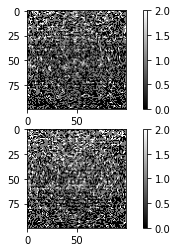

In [24]:
## Part 1
# For randomly picking two frames with varied exposure from exposure list
x = x.astype('float')
f = plt.figure()
f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
plt.imshow(x[0,0,:,:], cmap = 'gray')
plt.colorbar()
f.add_subplot(2,1,2)
plt.imshow(x[0,49,:,:], cmap = 'gray')
plt.colorbar()

In [25]:
sio.savemat("100frames15exp_part1.mat", {"images":x})

In [26]:
## Part 1
# Graph of exposure time vs mean offest value in AOIs
offset = np.zeros((17,100,100))
for i in range(17):
    offset[i,:,:] = np.mean(x[i,:,:,:],axis = 1) 

offset_vals = np.zeros((17,1))
for j in range(17):
    offset_vals[j] = np.mean(offset[j,:,:])

#Either just do it about axis 2 since it's a square, or do np.mean twice over axis 1 and 2, 
# or fo np.mean over axis 1 (--> (17,100) matrix of avg column values) then divide by 100
# I don't think averaging over columns will work for variance and stdev

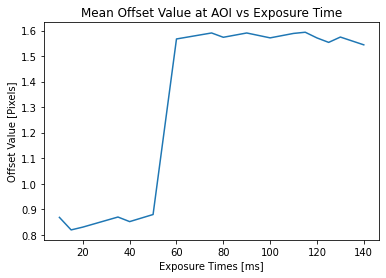

In [27]:
## Part 1
plt.plot(exp, offset_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value at AOI vs Exposure Time")
plt.savefig("MeanOffsetVsExposure_part1.png")


In [28]:
## Part 1
# Graph of exposure time vs variance value in AOIs
variance = np.zeros((17,100,100))
for i in range(17):
    variance[i,:,:] = np.mean(x[i,:,:,:],axis = 1)  

variance_vals = np.zeros((17,1))
for j in range(17):
    variance_vals[j] = np.var(variance[j,:,:])

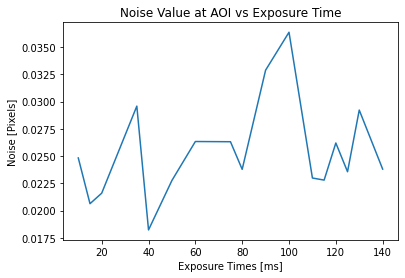

In [29]:
plt.plot(exp, variance_vals)
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Noise [Pixels]")
plt.title("Noise Value at AOI vs Exposure Time")
plt.savefig("NoiseVarianceVsExposure_part1.png")

### Take some images and vary exposure time and ROI to get a sense of the camera. 

In [37]:
## Part 2
# Full-field mean and variance images with good exposure
# This sets the starting point of the rectangle in the X-direction west to east. and Y-direction north to south
x0, y0 = 0, 0
# this sets the width and height of the rectangle. 
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

# Aperature: 6 
# Focus: 0.37 m
# Exposure: 120 ms



(0, 0, 1280, 1024)

In [38]:
## Part 2
img_total = 0
avg2 = np.zeros((50,1024,1280))
for i in range(50):
    # set cam exposure (ms) 
    cam._set_exposure('120 ms')
    cam._get_exposure()
    #take an image
    img = cam.grab_image().copy()
    avg2[i,:,:] = img
    
avg2 = avg2.astype('float')
average2 = np.mean(avg2,axis = 0)
variance2 = np.var(avg2, axis = 0)

In [39]:
sio.savemat("50framesMean_part2.mat", {"average2":average2})
sio.savemat("50framesVariance_part2.mat", {"variance2":variance2})

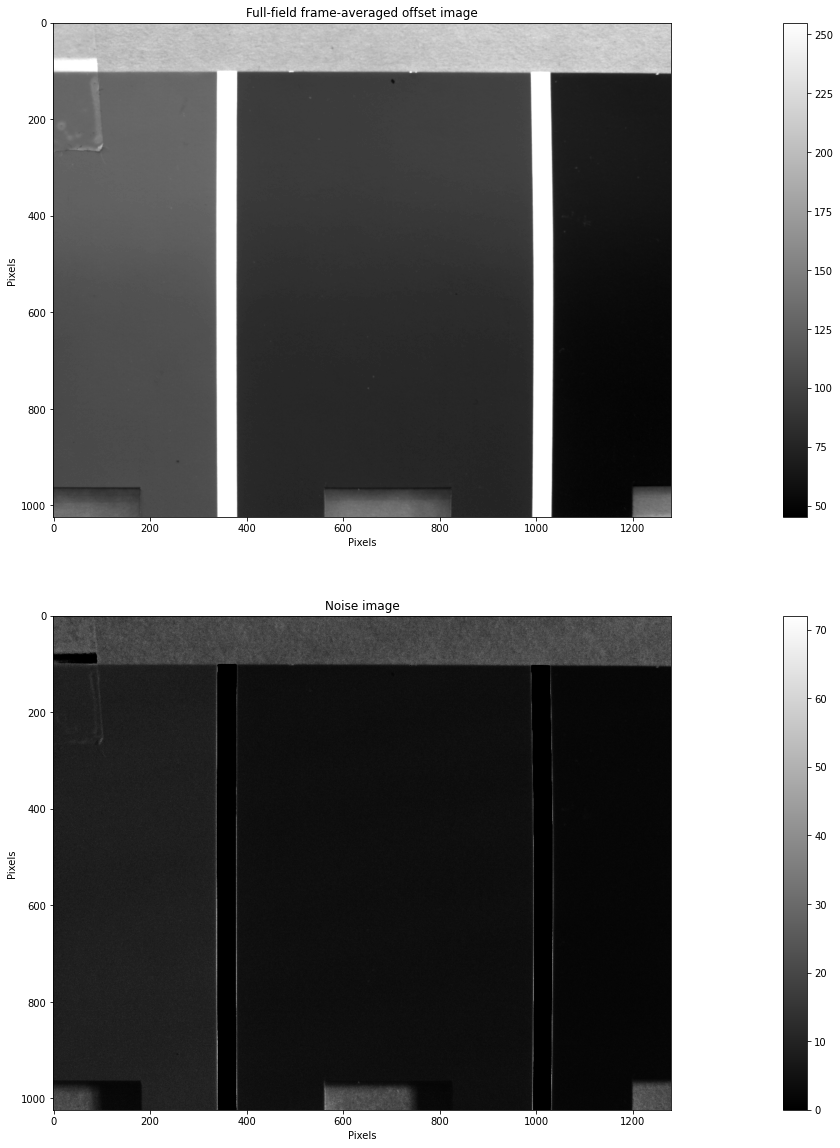

In [40]:
## Part 2
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

f.add_subplot(2,1,1)
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(average2, cmap = 'gray')
plt.title('Full-field frame-averaged offset image')
plt.colorbar()


f.add_subplot(2,1,2)
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Pixels")
ax2.set_ylabel("Pixels")
plt.imshow(variance2, cmap = 'gray')
plt.title('Noise image')
plt.colorbar()

f.savefig("50FramesAvgVar_part2.png")

In [41]:
## Part 2
# Lightest gray AOI
x0, y0 = 200, 200
# this sets the width and height of the rectangle. 
width, height = 100, 100
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

(200, 200, 100, 100)

In [42]:
## Part 2
# 100 frames at 15 exposures: location 1
# 100 frames at 15 exposures
x = np.zeros((17, 100,100,100))
exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp:
    for i in range(100):
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x[j,i,:,:] = img
    j += 1

In [44]:
sio.savemat("ThreeAOIs100Frames_part2.mat", {"lightest_gray":x})

In [45]:
## Part 2
# Middle gray AOI
x0, y0 = 450, 200
# this sets the width and height of the rectangle. 
width, height = 100, 100
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

(450, 200, 100, 100)

In [46]:
## Part 2
# 100 frames at 15 exposures: location 2
# 100 frames at 15 exposures
x2 = np.zeros((17, 100,100,100))
exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp:   
    for i in range(100):
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x2[j,i,:,:] = img       
    j += 1

In [47]:
sio.savemat("ThreeAOIs100Frames_part2.mat", {"middle_gray":x2})

In [48]:
## Part 2
# Dark gray AOI
x0, y0 = 1100, 200
# this sets the width and height of the rectangle. 
width, height = 100, 100
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

(1100, 200, 100, 100)

In [49]:
## Part 2
# 100 frames at 15 exposures: location 3
# 100 frames at 15 exposures
x3 = np.zeros((17, 100,100,100))
exp = [10, 15, 20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp:
    for i in range(100):
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x3[j,i,:,:] = img    
    j += 1

In [50]:
sio.savemat("ThreeAOIs100Frames_part2.mat", {"darkest_gray":x3})

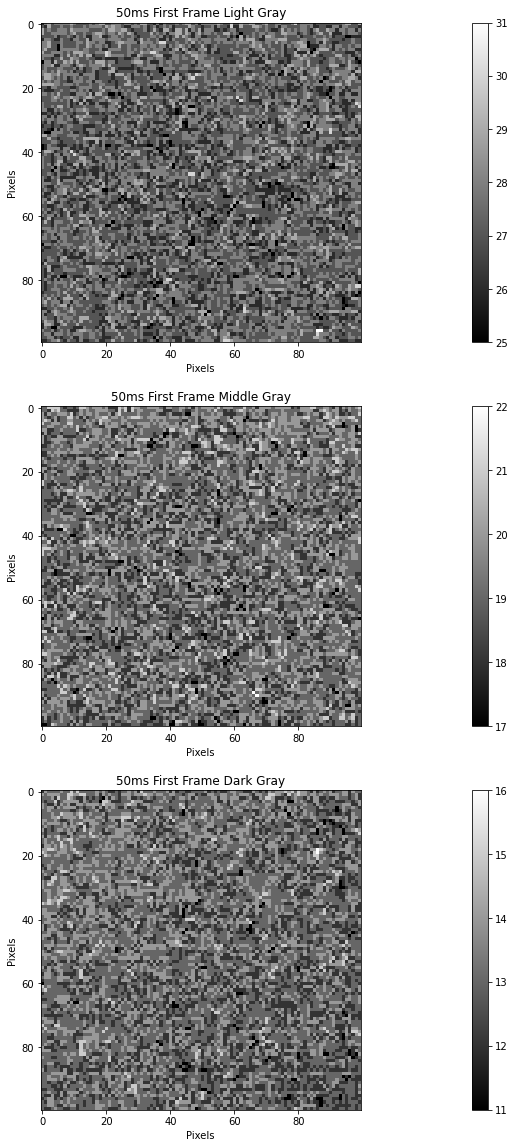

In [56]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

f.add_subplot(3,1,1)
ax1 = plt.subplot(3,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Light Gray')
plt.colorbar()

f.add_subplot(3,1,2)
ax1 = plt.subplot(3,1,2)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x2[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Middle Gray')
plt.colorbar()

f.add_subplot(3,1,3)
ax1 = plt.subplot(3,1,3)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(x3[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Dark Gray')
plt.colorbar()


In [73]:
## Full-field image
x0, y0 = 0,0
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

full_images_x = np.zeros((15,100,100,100))
full_images_x2 = np.zeros((15,100,100,100))
full_images_x3 = np.zeros((15,100,100,100))
exp = [20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp: 
    
    for i in range(100):
        print(val,i)
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        
        full_images_x[j,i,:,:] = img[200:300, 200:300]
        full_images_x2[j,i,:,:] = img[200:300, 450:550] 
        full_images_x3[j,i,:,:] = img[200:300, 1100:1200] 
    j += 1
    


20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
20 20
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38
20 39
20 40
20 41
20 42
20 43
20 44
20 45
20 46
20 47
20 48
20 49
20 50
20 51
20 52
20 53
20 54
20 55
20 56
20 57
20 58
20 59
20 60
20 61
20 62
20 63
20 64
20 65
20 66
20 67
20 68
20 69
20 70
20 71
20 72
20 73
20 74
20 75
20 76
20 77
20 78
20 79
20 80
20 81
20 82
20 83
20 84
20 85
20 86
20 87
20 88
20 89
20 90
20 91
20 92
20 93
20 94
20 95
20 96
20 97
20 98
20 99
35 0
35 1
35 2
35 3
35 4
35 5
35 6
35 7
35 8
35 9
35 10
35 11
35 12
35 13
35 14
35 15
35 16
35 17
35 18
35 19
35 20
35 21
35 22
35 23
35 24
35 25
35 26
35 27
35 28
35 29
35 30
35 31
35 32
35 33
35 34
35 35
35 36
35 37
35 38
35 39
35 40
35 41
35 42
35 43
35 44
35 45
35 46
35 47
35 48
35 49
35 50
35 51
35 52
35 53
35 54
35 55
35 56
35 57
35 58
35 59
35 60
35 61
35 62
35 63
35 64
35 65
35 66
35 67
35 68
35 69


130 4
130 5
130 6
130 7
130 8
130 9
130 10
130 11
130 12
130 13
130 14
130 15
130 16
130 17
130 18
130 19
130 20
130 21
130 22
130 23
130 24
130 25
130 26
130 27
130 28
130 29
130 30
130 31
130 32
130 33
130 34
130 35
130 36
130 37
130 38
130 39
130 40
130 41
130 42
130 43
130 44
130 45
130 46
130 47
130 48
130 49
130 50
130 51
130 52
130 53
130 54
130 55
130 56
130 57
130 58
130 59
130 60
130 61
130 62
130 63
130 64
130 65
130 66
130 67
130 68
130 69
130 70
130 71
130 72
130 73
130 74
130 75
130 76
130 77
130 78
130 79
130 80
130 81
130 82
130 83
130 84
130 85
130 86
130 87
130 88
130 89
130 90
130 91
130 92
130 93
130 94
130 95
130 96
130 97
130 98
130 99
140 0
140 1
140 2
140 3
140 4
140 5
140 6
140 7
140 8
140 9
140 10
140 11
140 12
140 13
140 14
140 15
140 16
140 17
140 18
140 19
140 20
140 21
140 22
140 23
140 24
140 25
140 26
140 27
140 28
140 29
140 30
140 31
140 32
140 33
140 34
140 35
140 36
140 37
140 38
140 39
140 40
140 41
140 42
140 43
140 44
140 45
140 46
140 47
140 48
1

In [89]:
sio.savemat("ThreeAOIs100Frames_part2.mat", {"lightest_gray":full_images_x})
sio.savemat("ThreeAOIs100Frames_part2.mat", {"middle_gray":full_images_x2})
sio.savemat("ThreeAOIs100Frames_part2.mat", {"darkest_gray":full_images_x3})

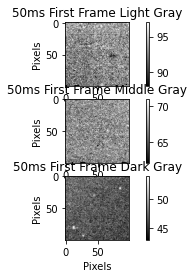

In [74]:
f = plt.figure()
# f.set_figwidth(40)
# f.set_figheight(20)

f.add_subplot(3,1,1)
ax1 = plt.subplot(3,1,1)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(full_images_x[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Light Gray')
plt.colorbar()

f.add_subplot(3,1,2)
ax1 = plt.subplot(3,1,2)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(full_images_x2[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Middle Gray')
plt.colorbar()

f.add_subplot(3,1,3)
ax1 = plt.subplot(3,1,3)
ax1.set_xlabel("Pixels")
ax1.set_ylabel("Pixels")
plt.imshow(full_images_x3[5,1,:,:], cmap = 'gray')
plt.title('50ms First Frame Dark Gray')
plt.colorbar()


In [76]:
## Part 2
# Graph of exposure time vs mean offest value in AOI: Three grays
x = full_images_x.astype('float')
x2 = full_images_x2.astype('float')
x3 = full_images_x3.astype('float')

# Lightest gray
offset1 = np.zeros((15,100,100))
for i in range(15):
    offset1[i,:,:] = np.mean(x[i,:,:,:],axis = 1)  
offset1_vals = np.zeros((15,1))
for j in range(15):
    offset1_vals[j] = np.mean(offset1[j,:,:])


# Middle gray
offset2 = np.zeros((15,100,100))
for i in range(15):
    offset2[i,:,:] = np.mean(x2[i,:,:,:],axis = 1)  
offset2_vals = np.zeros((15,1))
for j in range(15):
    offset2_vals[j] = np.mean(offset2[j,:,:])


# Darkest gray
offset3 = np.zeros((15,100,100))
for i in range(15):
    offset3[i,:,:] = np.mean(x3[i,:,:,:],axis = 1)  
offset3_vals = np.zeros((15,1))
for j in range(15):
    offset3_vals[j] = np.mean(offset3[j,:,:])

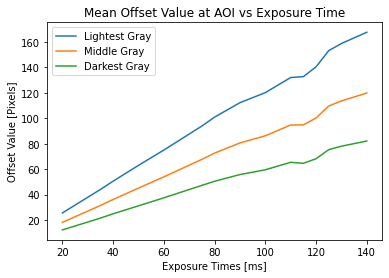

In [77]:
plt.plot(exp, offset1_vals, label = "Lightest Gray") 
plt.plot(exp, offset2_vals, label = "Middle Gray") 
plt.plot(exp, offset3_vals, label = "Darkest Gray")
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Offset Value [Pixels]")
plt.title("Mean Offset Value at AOI vs Exposure Time")
plt.legend()
plt.savefig("MeanOffsetVsExposure_part2.png")

In [79]:
## Part 2
# Graph of exposure time vs. noise/ variance value in AOI: three grays


# Lightest gray
variance = np.zeros((15,100,100))
for i in range(15):
    variance[i,:,:] = np.mean(x[i,:,:,:],axis = 1)
variance_vals = np.zeros((15,1))
for j in range(15):
    variance_vals[j] = np.var(variance[j,:,:])


# Middle Gray
variance2 = np.zeros((15,100,100))
for i in range(15):
    variance2[i,:,:] = np.mean(x2[i,:,:,:],axis = 1)  
variance2_vals = np.zeros((15,1))
for j in range(15):
    variance2_vals[j] = np.var(variance2[j,:,:])


# Darkest Gray
variance3 = np.zeros((15,100,100))
for i in range(15):
    variance3[i,:,:] = np.mean(x3[i,:,:,:],axis = 1)
variance3_vals = np.zeros((15,1))
for j in range(15):
    variance3_vals[j] = np.var(variance3[j,:,:])

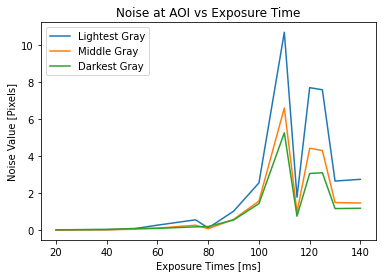

In [80]:
plt.plot(exp, variance_vals, label = "Lightest Gray") 
plt.plot(exp, variance2_vals, label = "Middle Gray") 
plt.plot(exp, variance3_vals, label = "Darkest Gray")
plt.legend()
plt.xlabel("Exposure Times [ms]")
plt.ylabel("Noise Value [Pixels]")
plt.title("Noise at AOI vs Exposure Time")
plt.savefig("NoiseVarianceVsExposure_part2.png")

In [82]:
## Part 2
#SNR graph
# Lightest Gray
stdev = np.zeros((15,100,100))
for i in range(15):
    stdev[i,:,:] = np.mean(x[i,:,:,:],axis = 1)
stdev_vals = np.zeros((15,1))
for j in range(15):
    stdev_vals[j] = np.std(stdev[j,:,:])

snr = np.zeros((15,1))
for k in range(15):
    val = offset1_vals[k] / stdev_vals[k]
    snr[k] = val

# Middle Gray
stdev2 = np.zeros((15,100,100))
for i in range(15):
    stdev2[i,:,:] = np.mean(x2[i,:,:,:],axis = 1)
stdev2_vals = np.zeros((15,1))
for j in range(15):
    stdev2_vals[j] = np.std(stdev2[j,:,:])

snr2 = np.zeros((15,1))
for k in range(15):
    val = offset2_vals[k] / stdev2_vals[k]
    snr2[k] = val
    
# Darkest Gray
stdev3 = np.zeros((15,100,100))
for i in range(15):
    stdev3[i,:,:] = np.mean(x3[i,:,:,:],axis = 1) 
stdev3_vals = np.zeros((15,1))
for j in range(15):
    stdev3_vals[j] = np.std(stdev3[j,:,:])

snr3 = np.zeros((15,1))
for k in range(15):
    val = offset3_vals[k] / stdev3_vals[k]
    snr3[k] = val

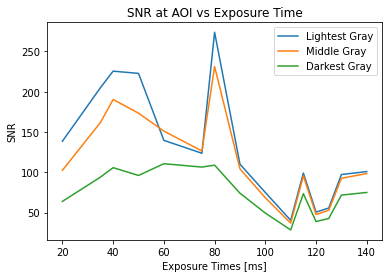

In [83]:
plt.plot(exp, snr, label = "Lightest Gray")
plt.plot(exp, snr2, label = "Middle Gray")
plt.plot(exp, snr3, label = "Darkest Gray")
plt.xlabel("Exposure Times [ms]")
plt.ylabel("SNR")
plt.title("SNR at AOI vs Exposure Time")
plt.legend()
plt.savefig("SNRVsExposure_part2.png")

In [88]:
# Part 3: auto-exposure
# Take 20 frames at various exposures over exposure range
print(cam._get_exposure_range())
# Gives min and max, decide on step based on size of range/15
exposure = list(range(10, 140, 10))
x4 = np.zeros((len(exposure),20,1024,1280))
j = 0
for val in exposure:
    for i in range(20):
        print(val, i)
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        x4[j,i,:,:] = img
    j += 1
sio.savemat("AutoExposureImageData_Par3", {"Images": x4})


(<Quantity(0.00898245614, 'millisecond')>, <Quantity(197.594526, 'millisecond')>)
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
30 0
30 1
30 2
30 3
30 4
30 5
30 6
30 7
30 8
30 9
30 10
30 11
30 12
30 13
30 14
30 15
30 16
30 17
30 18
30 19
40 0
40 1
40 2
40 3
40 4
40 5
40 6
40 7
40 8
40 9
40 10
40 11
40 12
40 13
40 14
40 15
40 16
40 17
40 18
40 19
50 0
50 1
50 2
50 3
50 4
50 5
50 6
50 7
50 8
50 9
50 10
50 11
50 12
50 13
50 14
50 15
50 16
50 17
50 18
50 19
60 0
60 1
60 2
60 3
60 4
60 5
60 6
60 7
60 8
60 9
60 10
60 11
60 12
60 13
60 14
60 15
60 16
60 17
60 18
60 19
70 0
70 1
70 2
70 3
70 4
70 5
70 6
70 7
70 8
70 9
70 10
70 11
70 12
70 13
70 14
70 15
70 16
70 17
70 18
70 19
80 0
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
80 11
80 12
80 13
80 14
80 15
80 16
80 17
80 18
80 19
90 0
90 1
90 2
90 3
90 4
90 5
90 6
90 

In [ ]:
# Calculate SNR for each exposure (mean and standard deviation), put in a list (same method as above, but fixed)
x4 = x4.astype("float")
offset4 = np.zeros((len(exposure),20,1024,1280))
for i in range(len(exposure)):
    offset4[i,:,:] = np.mean(x4[i,:,:,:],axis = 1)  
offset4_vals = np.zeros((len(exposure),1))
for j in range(len(exposure)):
    offset4_vals[j] = np.mean(offset4[j,:,:])
stdev4_vals = np.zeros((len(exposure),1))
for j in range(len(exposure)):
    stdev4_vals[j] = np.std(offset4[j,:,:])

snr4 = np.zeros((len(exposure),1))
for k in range(len(exposure)):
    val = offset4_vals[k] / stdev4_vals[k]
    snr4[k] = val
    
print("SNR Lists:", snr4)
# If new SNR < old SNR, set exposure to that assoicated with old SNR;
# Also pick set of middle exposure values (cut out extremes we know won't work)

# Find max value in that list, then its location, then set exposure to value in list at same location
# best = max(snr)
# loc_exp = snr.index(max)
# auto_exp = exposure[loc_exp]

# cam._set_exposure(auto_exp)
# cam._get_exposure()

(1024, 1280)


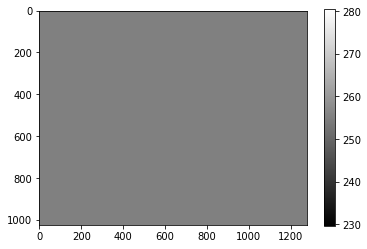

In [ ]:
img2 = cam.grab_image().copy()
im2 = plt.imshow(img2,cmap='gray')
plt.colorbar(im2)

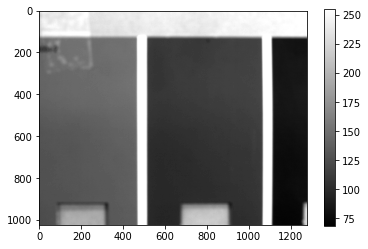

In [20]:
img3 = cam.grab_image().copy()
im3 = plt.imshow(img3,cmap='gray')
plt.colorbar(im3)

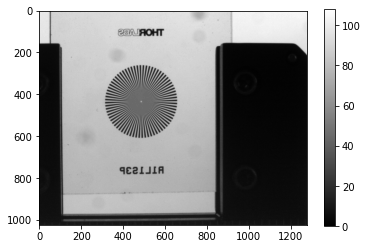

In [34]:
img4 = cam.grab_image().copy()
im4 = plt.imshow(img4,cmap='gray')
plt.colorbar(im4)

#### Live Video Feed for tuning focal length and aperture. 

In [34]:
cam._get_AOI() # look at the Area of Interest. 

(0, 0, 1280, 1024)

In [35]:
# set frame rate
cam.set_framerate(framerate = "10Hz")
# get exposure range, you can see that the frame rate will change the maximum exposure time. 
print(cam._get_exposure_range())
# print current frame rate
print(cam.framerate) 

(<Quantity(0.00898245614, 'millisecond')>, <Quantity(197.594526, 'millisecond')>)
5.05606735178449 hertz


In [17]:
# to quit press live feed press "q"
cam.start_live_video()
while cam.is_open:
     
     frame = cam.grab_image(timeout='100s', copy=True)
     frame1 = np.stack((frame,) * 3,-1) #make frame as 1 channel image
     frame1 = frame1.astype(np.uint8)
     gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
     #now u can apply opencv features
     cv2.imshow('Camera', gray)
     if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cam.stop_live_video()
cv2.destroyAllWindows()

2.0472896614601814 hertz


In [30]:
## Full-field image and cropped to 3 AOIs
x0, y0 = 0,0
width, height = 1280, 1024
cam._set_AOI(x0, y0, width, height)
cam._get_AOI()

full_images_x = np.zeros((15,100,100,100))
full_images_x2 = np.zeros((15,100,100,100))
full_images_x3 = np.zeros((15,100,100,100))
exp = [20, 35, 40, 50, 60, 75, 80, 90, 100, 110, 115, 120, 125, 130, 140]
j = 0
for val in exp: 
    
    for i in range(100):
        print(val,i)
        # set cam exposure (ms) 
        cam._set_exposure(str(val)+ ' ms')
        #take an image
        img = cam.grab_image().copy()
        
        full_images_x[j,i,:,:] = img[200:300, 200:300]
        full_images_x2[j,i,:,:] = img[200:300, 450:550] 
        full_images_x3[j,i,:,:] = img[200:300, 1100:1200] 
    j += 1
    
sio.savemat("ThreeAOIs100Frames_part2.mat", {"lightest_gray":full_images_x, "middle_gray":full_images_x2,"darkest_gray":full_images_x3})

20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
20 20
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38
20 39
20 40
20 41
20 42
20 43
20 44
20 45
20 46
20 47
20 48
20 49
20 50
20 51
20 52
20 53
20 54
20 55
20 56
20 57
20 58
20 59
20 60
20 61
20 62
20 63
20 64
20 65
20 66
20 67
20 68
20 69
20 70
20 71
20 72
20 73
20 74
20 75
20 76
20 77
20 78
20 79
20 80
20 81
20 82
20 83
20 84
20 85
20 86
20 87
20 88
20 89
20 90
20 91
20 92
20 93
20 94
20 95
20 96
20 97
20 98
20 99
35 0
35 1
35 2
35 3
35 4
35 5
35 6
35 7
35 8
35 9
35 10
35 11
35 12
35 13
35 14
35 15
35 16
35 17
35 18
35 19
35 20
35 21
35 22
35 23
35 24
35 25
35 26
35 27
35 28
35 29
35 30
35 31
35 32
35 33
35 34
35 35
35 36
35 37
35 38
35 39
35 40
35 41
35 42
35 43
35 44
35 45
35 46
35 47
35 48
35 49
35 50
35 51
35 52
35 53
35 54
35 55
35 56
35 57
35 58
35 59
35 60
35 61
35 62
35 63
35 64
35 65
35 66
35 67
35 68
35 69


130 4
130 5
130 6
130 7
130 8
130 9
130 10
130 11
130 12
130 13
130 14
130 15
130 16
130 17
130 18
130 19
130 20
130 21
130 22
130 23
130 24
130 25
130 26
130 27
130 28
130 29
130 30
130 31
130 32
130 33
130 34
130 35
130 36
130 37
130 38
130 39
130 40
130 41
130 42
130 43
130 44
130 45
130 46
130 47
130 48
130 49
130 50
130 51
130 52
130 53
130 54
130 55
130 56
130 57
130 58
130 59
130 60
130 61
130 62
130 63
130 64
130 65
130 66
130 67
130 68
130 69
130 70
130 71
130 72
130 73
130 74
130 75
130 76
130 77
130 78
130 79
130 80
130 81
130 82
130 83
130 84
130 85
130 86
130 87
130 88
130 89
130 90
130 91
130 92
130 93
130 94
130 95
130 96
130 97
130 98
130 99
140 0
140 1
140 2
140 3
140 4
140 5
140 6
140 7
140 8
140 9
140 10
140 11
140 12
140 13
140 14
140 15
140 16
140 17
140 18
140 19
140 20
140 21
140 22
140 23
140 24
140 25
140 26
140 27
140 28
140 29
140 30
140 31
140 32
140 33
140 34
140 35
140 36
140 37
140 38
140 39
140 40
140 41
140 42
140 43
140 44
140 45
140 46
140 47
140 48
1

In [ ]:
cam.close()

In [ ]:
del cam